Optical properties of responsive hybrid Au@polymer nanoparticles
========

Must change title eventually

Supporting information - data analysis: import & initial plots
--------

Abstract
--------

We take a close look at the physical and optical properties of Au@PNIPAM core-shell nanoparticles.
- Small Au cores, radius $\sim$ 8.5 nm
- Wide range of shell thickness, 15 to 200 nm
- Two shell architectures: 
    - grafted/linear, thin range: [16, 65] nm
    - seeded-precipitation/cross-linked, thick range: [50, 193] nm
- Studied with UV-vis, DLS, SLS, TEM

# 1. Initialize analysis

## 1.1 Initialize computational/python framework

In [1]:
%run header

Loading import modules ...
Loading analysis codes ... 
  ... refractive index functions loaded:
       Au, Ag, SiO2, ITO, ZnO, H2O, 
       ethanol, CS2, benzene, toluene, 
       chloroform, methanol, butanol, 
       propanol
  ... Mie functions loaded
  ... local Mie functions loaded
Ready player one.


# Import & analyze data from TEM

## Linear PNIPAM cores (AW5), from ImageJ particle analysis, using area

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, c linear-long, 3 images, AW5-DS02_b2_0017+0021+0022.csv
  nanoparticle statistics, a linear-short, 3 images, AW5-273_0015+0015+0017.csv
  nanoparticle statistics, b linear-med, 5 images, AW5-TH089_0015+0016+0017+0018+0019.csv
Analyzing data ...
  mean, S.D.:  8.49611306757 1.23024441618
  Gaussian fit: mu, sigma: 		 [ 8.38774643  1.23884904]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.05033274  0.05148306]


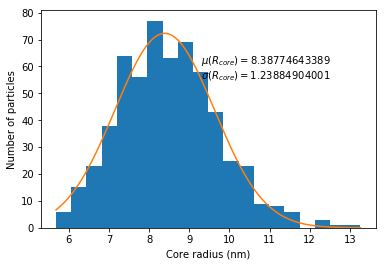

  mean, S.D.:  9.51159880323 1.42401611651
  Gaussian fit: mu, sigma: 		 [ 9.2370344   1.08862851]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02786125  0.02786127]


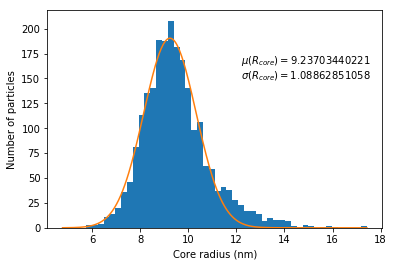

  mean, S.D.:  9.03498546581 1.03332797554
  Gaussian fit: mu, sigma: 		 [ 8.87376865  0.8206906 ]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02291847  0.02291865]


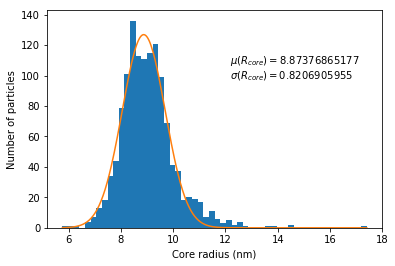

  mean, S.D.:  9.2211971908 1.33899818296
  Gaussian fit: mu, sigma: 		 [ 9.00765483  1.03060426]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02094189  0.0209419 ]


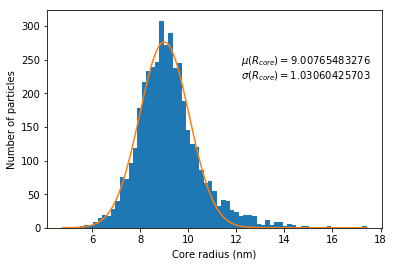

In [2]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData0 = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)
tempData1 = np.genfromtxt(folderName+'/'+fileNames[1], delimiter=',', skip_header=1)
tempData2 = np.genfromtxt(folderName+'/'+fileNames[2], delimiter=',', skip_header=1)
tempData = np.concatenate((tempData0, tempData1, tempData2), axis=0)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData0, tempData1, tempData2, tempData]:
    radii = np.sqrt(data[:,1]/pi)
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$\mu(R_{core})=$' + str(popt[1]) + '\n' + '$\sigma(R_{core})=$' + str(popt[2]))
    pylab.text(bin_edges[-1]*.7, amp*.7, figText, verticalalignment='bottom', horizontalalignment='left')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = "AW5-" + ["a, linear-short", "b, linear-med", "c, linear-long", "a-c, linear-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    # pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()

## Linear PNIPAM cores (AW5), from ImageJ particle analysis, using mean of major/minor axis

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, a linear-short, 3 images, AW5-273_0015+0015+0017.csv
  nanoparticle statistics, b linear-med, 5 images, AW5-TH089_0015+0016+0017+0018+0019.csv
  nanoparticle statistics, c linear-long, 3 images, AW5-DS02_b2_0017+0021+0022.csv
Analyzing data ...
  mean, S.D.:  9.55207660228 1.46349505045
  Gaussian fit: mu, sigma: 		 [ 9.25721634  1.09071692]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02612803  0.02612805]


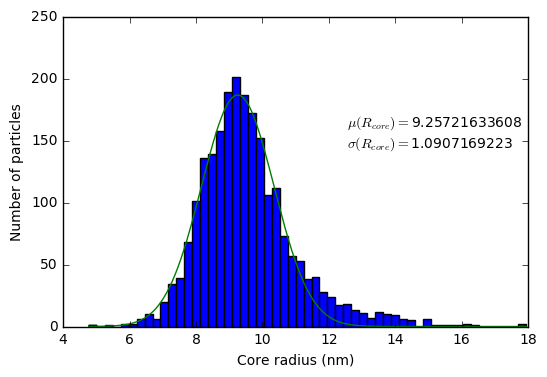

  mean, S.D.:  9.05515419636 1.04703850477
  Gaussian fit: mu, sigma: 		 [ 8.88885096  0.81909149]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02480927  0.02480943]


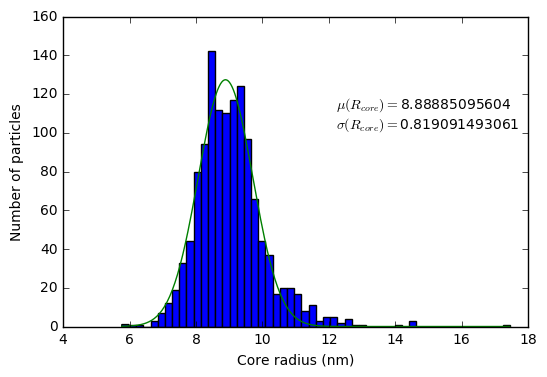

  mean, S.D.:  8.51818367347 1.23835249594
  Gaussian fit: mu, sigma: 		 [ 8.38482607  1.24152097]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.04331768  0.04436926]


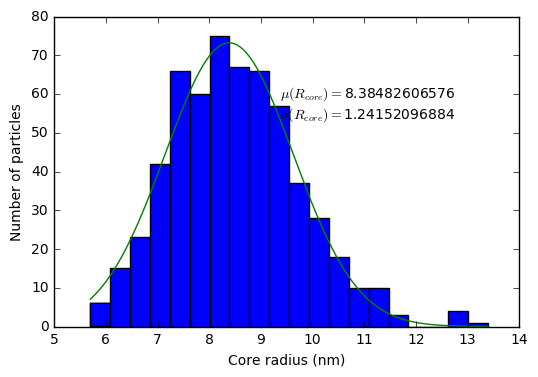

  mean, S.D.:  9.2528414265 1.36879323857
  Gaussian fit: mu, sigma: 		 [ 9.02044536  1.03141882]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.0199317   0.01993172]


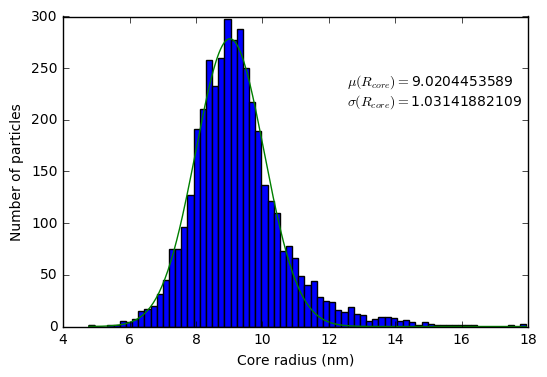

In [123]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData0 = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)
tempData1 = np.genfromtxt(folderName+'/'+fileNames[1], delimiter=',', skip_header=1)
tempData2 = np.genfromtxt(folderName+'/'+fileNames[2], delimiter=',', skip_header=1)
tempData = np.concatenate((tempData0, tempData1, tempData2), axis=0)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData0, tempData1, tempData2, tempData]:
    radii = 0.25*(data[:,4] + data[:,5])
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$\mu(R_{core})=$' + str(popt[1]) + '\n' + '$\sigma(R_{core})=$' + str(popt[2]))
    pylab.text(bin_edges[-1]*.7, amp*.7, figText, verticalalignment='bottom', horizontalalignment='left')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = "AW5-" + ["a, linear-short", "b, linear-med", "c, linear-long", "a-c, linear-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    # pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()

## Linear PNIPAM cores (AW5), from ImageJ particle analysis, using minor axis

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, a linear-short, 3 images, AW5-273_0015+0015+0017.csv
  nanoparticle statistics, b linear-med, 5 images, AW5-TH089_0015+0016+0017+0018+0019.csv
  nanoparticle statistics, c linear-long, 3 images, AW5-DS02_b2_0017+0021+0022.csv
Analyzing data ...
  mean, S.D.:  8.84650351185 1.24196575896
  Gaussian fit: mu, sigma: 		 [ 8.72275006  1.07270829]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02683957  0.02683958]
  Exported to:
   graphics/20170118_core-size-histogram_a, linear-short.svg


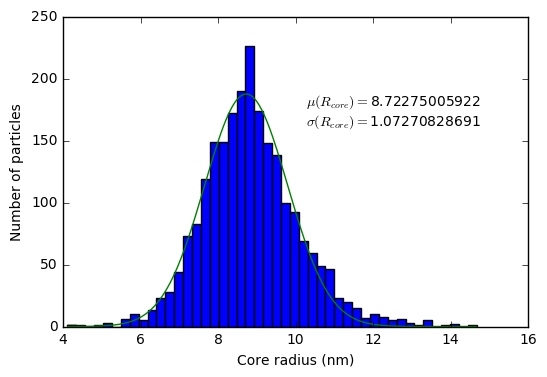

  mean, S.D.:  8.54091528108 0.925945653628
  Gaussian fit: mu, sigma: 		 [ 8.45052054  0.82187084]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.0172553   0.01725716]
  Exported to:
   graphics/20170118_core-size-histogram_b, linear-med.svg


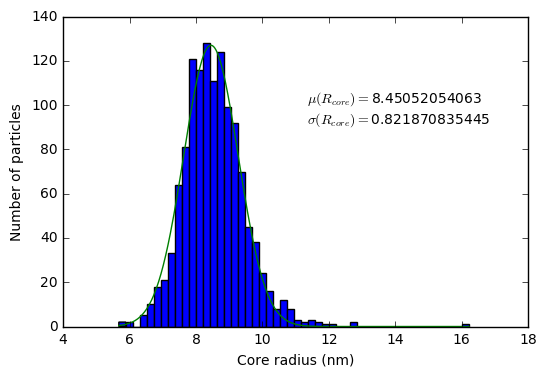

  mean, S.D.:  7.99221513605 1.17520358385
  Gaussian fit: mu, sigma: 		 [ 7.94840808  1.23407916]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.05618519  0.05661872]
  Exported to:
   graphics/20170118_core-size-histogram_c, linear-long.svg


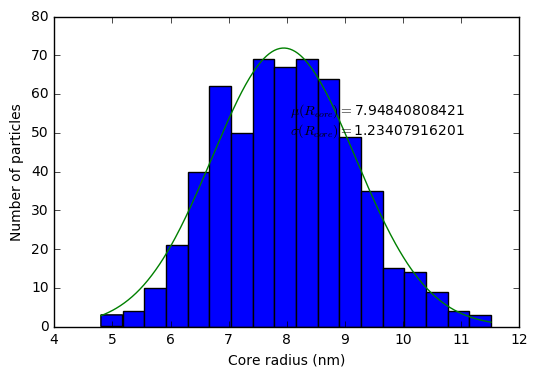

  mean, S.D.:  8.63137163962 1.1815870991
  Gaussian fit: mu, sigma: 		 [ 8.54201022  1.01072992]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.01960865  0.01960865]
  Exported to:
   graphics/20170118_core-size-histogram_a-c, linear-combined.svg


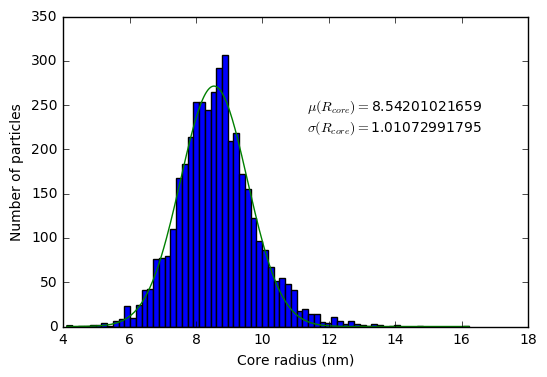

In [131]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData0 = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)
tempData1 = np.genfromtxt(folderName+'/'+fileNames[1], delimiter=',', skip_header=1)
tempData2 = np.genfromtxt(folderName+'/'+fileNames[2], delimiter=',', skip_header=1)
tempData = np.concatenate((tempData0, tempData1, tempData2), axis=0)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData0, tempData1, tempData2, tempData]:
    radii = 0.5*(data[:,5])
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$\mu(R_{core})=$' + str(popt[1]) + '\n' + '$\sigma(R_{core})=$' + str(popt[2]))
    pylab.text(bin_edges[-1]*.7, amp*.7, figText, verticalalignment='bottom', horizontalalignment='left')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = ["a, linear-short", "b, linear-med", "c, linear-long", "a-c, linear-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()

## Cross-linked cores, from previous analysis (M. Karg)

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, d x-linked all, core-diameter-distribution.csv
Analyzing data ...
  mean, S.D.:  6.70622390671 0.484409990774
  Gaussian fit: mu, sigma: 		 [ 6.76726048  0.54016943]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.05169725  0.05455907]
  Exported to:
   graphics/20170118_core-size-histogram_d-e, x-linked-combined.svg


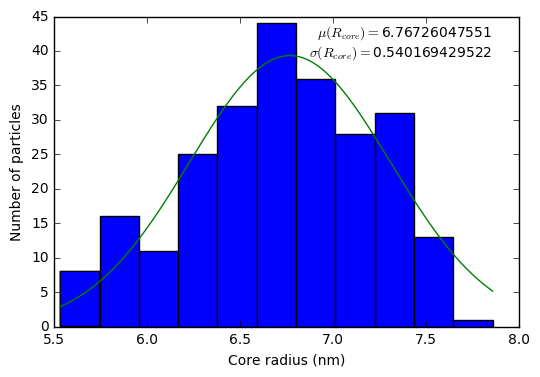

In [132]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' not in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData]:
    radii = 0.5*(data[:])
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", np.abs(popt[1:]))
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$\mu(R_{core})=$' + str(popt[1]) + '\n' + '$\sigma(R_{core})=$' + str(abs(popt[2])))
    pylab.text(bin_edges[-1], amp, figText, verticalalignment='top', horizontalalignment='right')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = ["d-e, x-linked-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()